<a href="https://colab.research.google.com/github/Air-pollution-and-COVID-19/CDMX/blob/master/plot_covid_cases_temp_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# What are the google colab shortcuts and understand directory tree
import numpy as np # Load the numpy library
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date, datetime
from matplotlib import rcParams as rcp

In [3]:
rcp['lines.linewidth'] = 2.
rcp['font.family'] = 'sans serif'
rcp['font.size'] = 18

In [4]:
!git clone https://github.com/cdcmx2020a/group_A_AlmaJair.git

Cloning into 'group_A_AlmaJair'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 297 (delta 114), reused 215 (delta 65), pack-reused 0
Receiving objects: 100% (297/297), 43.24 MiB | 26.26 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [5]:
!git clone https://github.com/Air-pollution-and-COVID-19/CDMX


Cloning into 'CDMX'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 171 (delta 18), reused 0 (delta 0), pack-reused 120
Receiving objects: 100% (171/171), 5.28 MiB | 10.03 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [6]:
cases = np.loadtxt('/content/CDMX/casos_diarios/diario_estado_cdmx.csv', delimiter=',') # Loads cases file

In [9]:
# Obtener casos diarios Tijuana
mat = np.loadtxt('/content/CDMX/casos_diarios/diario_estado_cdmx.csv',delimiter=',') # Baja California is 2

In [10]:
# Date of city
time = mat[0,:]
str(mat[0,0]) # dia , mes y año

'12012020.0'

In [11]:
cases_cdmx = mat[1,:] # number of cases in city

In [12]:
# Loads time mm,dd,yyyy HH,mm
time_final = np.zeros(time.shape[0])
for ii in range(time.shape[0]):
    if np.ma.is_masked(time[ii]) == False:
        if len(str(time[ii])) == 10:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[4:-2]), np.int(str(time[ii])[2:4]), np.int(str(time[ii])[0:2])))
        else:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[3:-2]), np.int(str(time[ii])[1:3]),
                                                            np.int(str(time[ii])[0:1])))
                

In [13]:
# https://en.climate-data.org/north-america/mexico/lower-california/tijuana-1005196/#temperature-graph
# https://meteostat.net/es/place/MX-9V9C?t=2019-01-01/2020-01-31
temp_mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/temp_diaria_2020_cdmx.csv', delimiter=',')

In [14]:
temp_mean = temp_mat[:,3]
temp_min = temp_mat[:,4]
temp_max = temp_mat[:,5] # asigna variables de temperatura

In [15]:
year = temp_mat[:,0]
month = temp_mat[:,1]
day = temp_mat[:,2]
time_final_temp = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time_final_temp[ii] = date2num(datetime.datetime(np.int(year[ii]), np.int(month[ii]),
                         np.int(day[ii])))

In [16]:
# Calcula el running mean, promedio de cada X dias
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [18]:
# calculate 14-day average
cases_lp = running_mean(cases_cdmx[1:], 14)

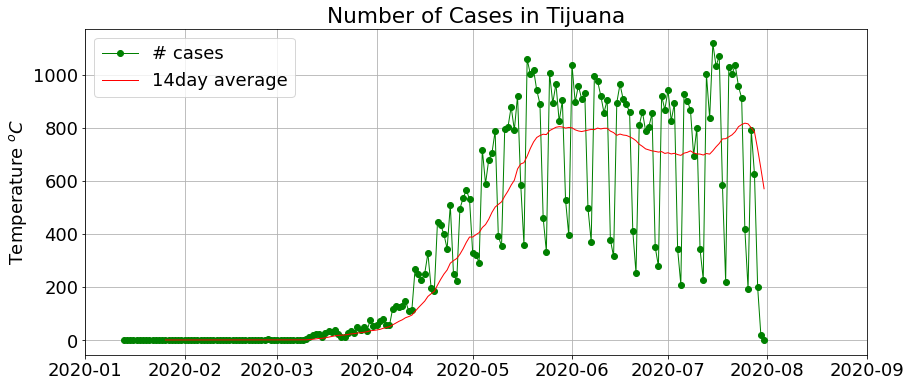

In [20]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Number of Cases in Tijuana'
ax.plot(num2date(time_final[1:]), cases_cdmx[1:], 'o-', lw=1, color='g', label='# cases')
ax.plot(num2date(time_final[len(cases_cdmx)-len(cases_lp):]), cases_lp, lw=1, color='r', label='14day average')

ax.set_title(tit)
ax.set_ylabel('# cases')
ax.legend(loc=2)
#ax.set_ylim(0, 280)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax.set_xlim(fi1, fi2)
ax.set_ylabel('Temperature $^oC$')
ax.grid()
# plt.savefig('Figura_Estado_Baja_California.png', bbox_inches='tight')

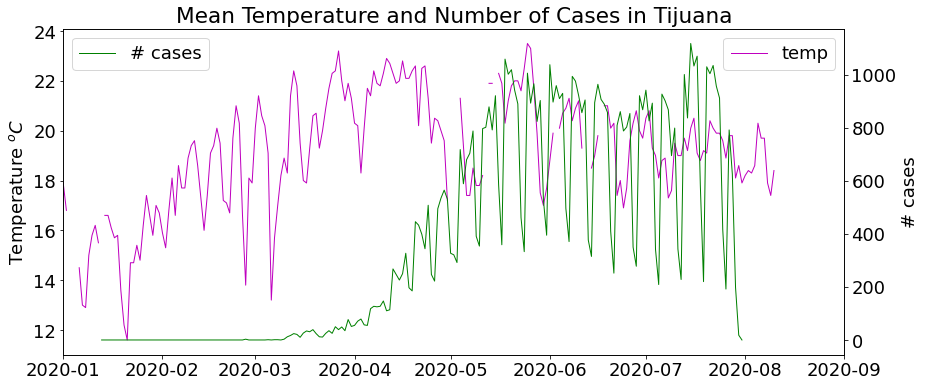

In [22]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Mean Temperature and Number of Cases in Tijuana'
ax1 = ax
ax1.plot(num2date(time_final_temp), temp_mean, lw=1, color='m', label='temp')
# ax1.plot(num2date(time_final_temp), temp_min, lw=1, color='r')
# ax1.plot(num2date(time_final_temp), temp_max, lw=1, color='k')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(num2date(time_final[1:]), cases_cdmx[1:], lw=1, color='g', label='# cases')
ax2.set_title(tit)
ax2.set_ylabel('# cases')
ax2.legend(loc=2)
#ax.set_ylim(0, 280)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax2.set_xlim(fi1, fi2)
ax1.set_ylabel('Temperature $^oC$')
plt.show()
# plt.savefig('Figura_Estado_Baja_California.png', bbox_inches='tight')

Este es un texto

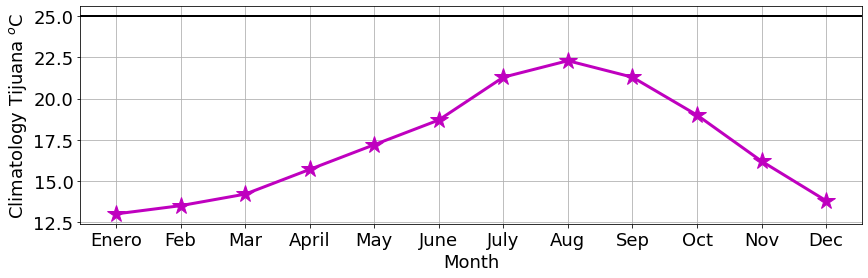

In [23]:
# Climatologia Tijuana
# Buscar datos de climatologia aqui https://es.climate-data.org/america-del-norte/mexico/baja-california/tijuana-1005196/#climate-table
# El comando np.asarray hace un arreglo de valores de la libreria numpy
temp_clim = np.asarray([13,	13.5,	14.2,	15.7,	17.2,	18.7,	21.3,	22.3,	21.3,	19,	16.2,	13.8])
# Hice un arreglo del 1 al 13 saltandose un numero. Python da valores uno menos que lo que muestra en arreglos
month = np.arange(1, 13, 1)
fig, axs = plt.subplots(1,1, figsize=(14,4))
axs.plot(month, temp_clim, '-*', linewidth=3, ms=18, color='m')
axs.axhline(y=25, color='k') # genera una linea en el valor de 25
axs.set_xticks(month);
axs.set_xticklabels(['Enero','Feb', 'Mar','April', 'May', 'June', 'July','Aug', 'Sep', 'Oct','Nov','Dec'])
axs.grid()
axs.set_xlabel('Month')
axs.set_ylabel('Climatology Tijuana $^o$C', fontsize=18)
plt.show()

In [27]:
temp_mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/temp_diaria_2020_cdmx.csv', delimiter=',')

In [28]:
year = temp_mat[:,0]
month = temp_mat[:,1]
day = temp_mat[:,2]
time_final_2019 = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time_final_2019[ii] = date2num(datetime.datetime(np.int(year[ii]), np.int(month[ii]),
                         np.int(day[ii])))

In [30]:
temp_mean_19 = temp_mat[:,3] # asigna temperatura a la matriz temp_mat
temp_min_19 = temp_mat[:,4]
temp_max_19 = temp_mat[:,5]
#prec_19 = temp_mat[:, 6]

Text(0.5, 0.98, 'Tijuana Temperature 2019')

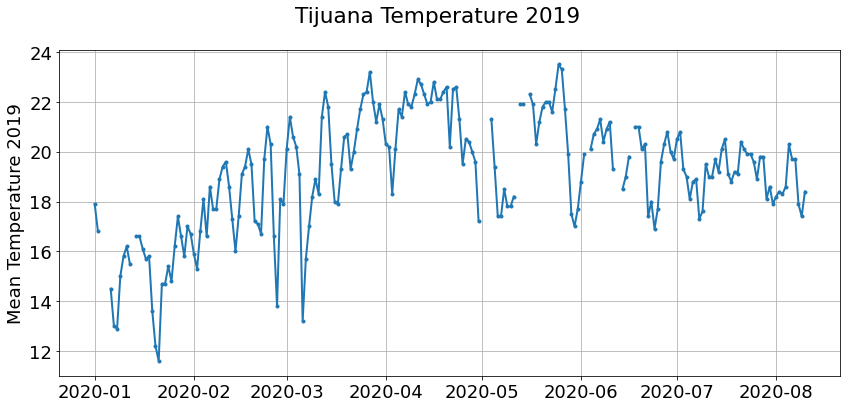

In [31]:
fig, axs = plt.subplots(1,1, figsize=(14, 6))
axs.plot(num2date(time_final_2019), temp_mean_19, '.-')
axs.grid()
#axs.set_xlabel('Month')
axs.set_ylabel('Mean Temperature 2019')
fig.suptitle('Tijuana Temperature 2019')

Text(0.5, 0.98, 'Tijuana rain 2019')

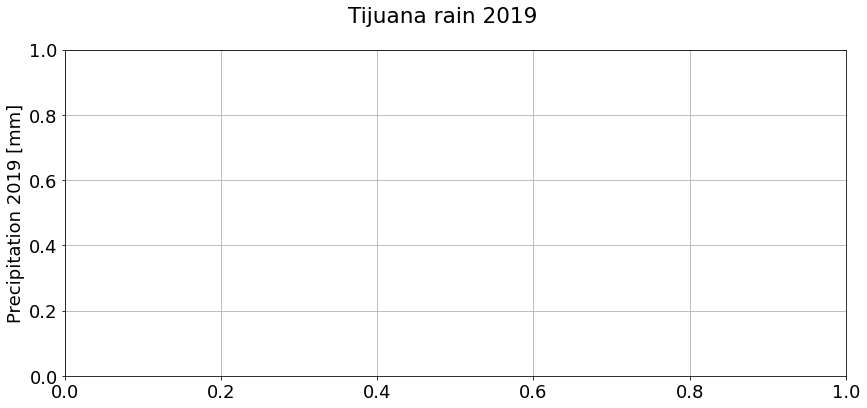

In [33]:
fig, axs = plt.subplots(1,1, figsize=(14, 6))
#axs.plot(num2date(time_final_2019), prec_19, '.-')
axs.grid()
#axs.set_xlabel('Month')
axs.set_ylabel('Precipitation 2019 [mm]')
fig.suptitle('Tijuana rain 2019')

# If Covid existed in 2019? Do you think temperature and rain would have an impact in COVID-19?

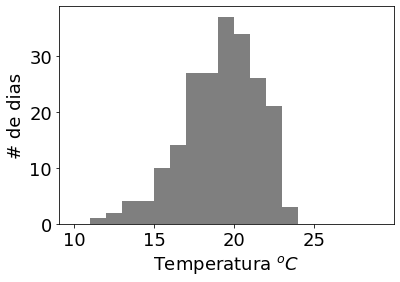

In [34]:
# Some statistics
fig, ax = plt.subplots()
ax.hist(temp_mean_19, bins=np.arange(10,30,1),
        color='k', alpha=0.5) # hace un histograma de los datos
ax.set_ylabel('# de dias')
ax.set_xlabel('Temperatura $^oC$')
plt.show()

In [ ]:
# EL histograma te dice cuantos dias al año la temperatura en la ciudad estuvo a cierto valor

In [35]:
print('Mean Temperature is ' + str(temp_mean_19.mean()))
print('Standard Deviation of Temperature is ' + str(temp_mean_19.std()))

Mean Temperature is nan
Standard Deviation of Temperature is nan


Text(0.5, 0.98, 'Histograma de temperatura en Tijuana 2019')

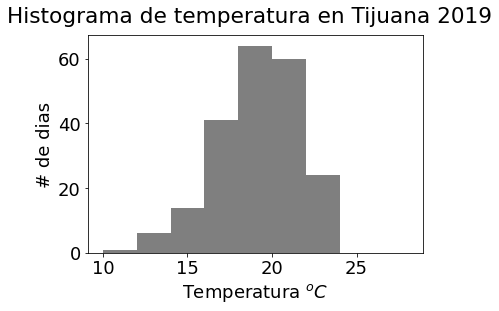

In [36]:
# Some statistics
fig, ax = plt.subplots()
ax.hist(temp_mean_19, bins=np.arange(10,30,2),
        color='k', alpha=0.5)
ax.axvline(x=temp_mean_19.mean(), lw=0.5, color='k') # pone una linea
ax.set_ylabel('# de dias')
ax.set_xlabel('Temperatura $^oC$')
fig.suptitle('Histograma de temperatura en Tijuana 2019')

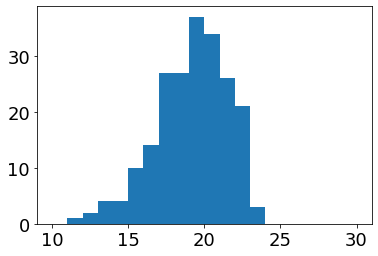

In [37]:
# si en la siguiente linea cambias el 10 y el 31 por los valores que quieras de temperatura
# y el 1 es para cada cuanto quieres el intervalo de temperatura
a = plt.hist(temp_mean_19, bins=np.arange(10,31,1)) # hace un histograma de los datos

In [38]:
days = a[0]
temp = a[1]

In [39]:
# Si cambias el indice dentro de [] ves otros valores
print('Hay ' + str(np.int(days[1])) + ' dias a ' + str(temp[1]) + ' grados C')

Hay 1 dias a 11 grados C


In [40]:
temp

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30])